# Predicting Wine Quality

We want to develop a predictive model that can accurately assess or predict the quality score of a wine based solely on its measurable physicochemical properties.

we will be using the [Wine Quality Dataset](https://archive.ics.uci.edu/dataset/186/wine+quality) from the UCI Machine Learning Repository since it is suitable for our goal


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
red = pd.read_csv("winequality-red.csv",sep=';')
white = pd.read_csv("winequality-white.csv",sep=';')

## Dataset Features

The wine quality dataset contains the following physicochemical features:

- **fixed acidity**: The amount of non-volatile acids (tartaric, malic, citric) in wine, measured in g/dm³. These acids contribute to the wine's tartness and stability.

- **volatile acidity**: The amount of acetic acid in wine, measured in g/dm³. High levels can indicate wine spoilage and result in a vinegar-like taste.

- **citric acid**: The amount of citric acid present, measured in g/dm³. It adds freshness and flavor to wines, though typically found in small quantities.

- **residual sugar**: The amount of sugar remaining after fermentation stops, measured in g/dm³. Determines whether a wine is dry, off-dry, or sweet.

- **chlorides**: The amount of salt in the wine, measured in g/dm³. Contributes to the wine's taste and mouthfeel.

- **free sulfur dioxide**: The amount of free SO₂ in mg/dm³. Acts as an antimicrobial and antioxidant agent to prevent spoilage and oxidation.

- **total sulfur dioxide**: The total amount of SO₂ (free + bound forms) in mg/dm³. Includes both free and bound sulfur dioxide used as a preservative.

- **density**: The density of the wine, measured in g/cm³. Related to the sugar and alcohol content; typically ranges from 0.99 to 1.01 g/cm³.

- **pH**: The measure of acidity/alkalinity on a scale of 0-14. Most wines have a pH between 2.9 and 3.9. Lower pH indicates higher acidity.

- **sulphates**: The amount of potassium sulphate in g/dm³. Added as an antioxidant and antimicrobial agent, similar to sulfur dioxide.

- **alcohol**: The alcohol content of the wine, measured as % by volume. Typically ranges from 8-15% and contributes to body, sweetness, and flavor intensity.

- **quality**: The target variable representing wine quality, scored by expert tasters on a scale of 0-10 (though typically ranges from 3-9 in practice).

- **type**: The type of wine (red or white), added during data preprocessing to distinguish between the two wine categories.

Now we are going to check which of the categories in these dataframes affect the quality of the wine the most

In [31]:
print(red["alcohol"].sort_values(ascending=False))
print(red["quality"].unique())

652     14.9
1269    14.0
588     14.0
467     14.0
1270    14.0
        ... 
371      8.7
528      8.7
1436     8.5
517      8.4
544      8.4
Name: alcohol, Length: 1599, dtype: float64
[5 6 7 4 8 3]


In [27]:
# Calculate the correlation matrix and sort by the 'quality' column
quality_correlations_red = red.corr()['quality'].sort_values(ascending=False)
quality_correlations_white = white.corr()['quality'].sort_values(ascending=False)

# Print the results
print("Quality Correlations for Red Wine: \n", quality_correlations_red, "\n")
print("Quality Correlations for White Wine: \n", quality_correlations_white)

Quality Correlations for Red Wine: 
 quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64 

Quality Correlations for White Wine: 
 quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


## Correlation Analysis: What Do These Values Tell Us?

### Key Findings:

**1. Alcohol is the Strongest Predictor (Both Wine Types)**
   - **Red Wine**: 0.476 (moderate positive correlation)
   - **White Wine**: 0.436 (moderate positive correlation)
   - **Interpretation**: Higher alcohol content is associated with better quality in both wine types. This makes sense as alcohol contributes to body, complexity, and flavor intensity that experts value.

**2. Significant Differences Between Red and White Wines**
   - **Sulphates**: Strong positive for red (0.251) vs. weak for white (0.054)
   - **Citric Acid**: Positive for red (0.226) vs. slightly negative for white (-0.009)
   - **pH**: Negative for red (-0.058) vs. positive for white (0.099)
   - **Residual Sugar**: Near zero for red (0.014) vs. negative for white (-0.098)
   - **Interpretation**: Red and white wines have fundamentally different quality drivers, supporting the need to consider wine type in modeling.

**3. Strong Negative Correlations (Quality Detractors)**
   - **Red Wine**: Volatile acidity (-0.391) - strongest negative predictor
   - **White Wine**: Density (-0.307) - strongest negative predictor
   - **Interpretation**: High volatile acidity (vinegar taste) hurts red wine quality. High density (often from residual sugar) hurts white wine quality.

**4. Weak Correlations (Limited Predictive Power)**
   - Many features have correlations near zero (|r| < 0.1), including:
     - Residual sugar (red: 0.014, white: -0.098)
     - Free sulfur dioxide (red: -0.051, white: 0.008)
     - Citric acid (white: -0.009)
   - **Interpretation**: These features alone have minimal direct impact on quality, but may be important in combination with other features.

**5. Feature Importance Ranking**
   - **Red Wine Top 3**: Alcohol (0.476), Sulphates (0.251), Citric Acid (0.226)
   - **White Wine Top 3**: Alcohol (0.436), pH (0.099), Sulphates (0.054)
   - **Interpretation**: Alcohol dominates for both, but secondary features differ significantly.

### Implications for Modeling:
- **Alcohol** should be a key feature in any model
- **Wine type matters** - the relationships differ substantially between red and white
- **Feature selection** may benefit from type-specific approaches or interaction terms
- **Non-linear relationships** may exist since many correlations are weak - consider polynomial features or tree-based models

Now we are going to check for any missing values or outliers (using histogram and boxplot)

In [44]:
#Checking for missing values in both datasets
print("Missing values in Red Wine:")
print(red.isnull().sum(), "\n")
print("Missing values in White Wine:")
print(white.isnull().sum(), "\n")

Missing values in Red Wine:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64 

Missing values in White Wine:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64 



Fortunately there is no missing values for any of the categories

Now we are going to check for any outliers for the alcohol category

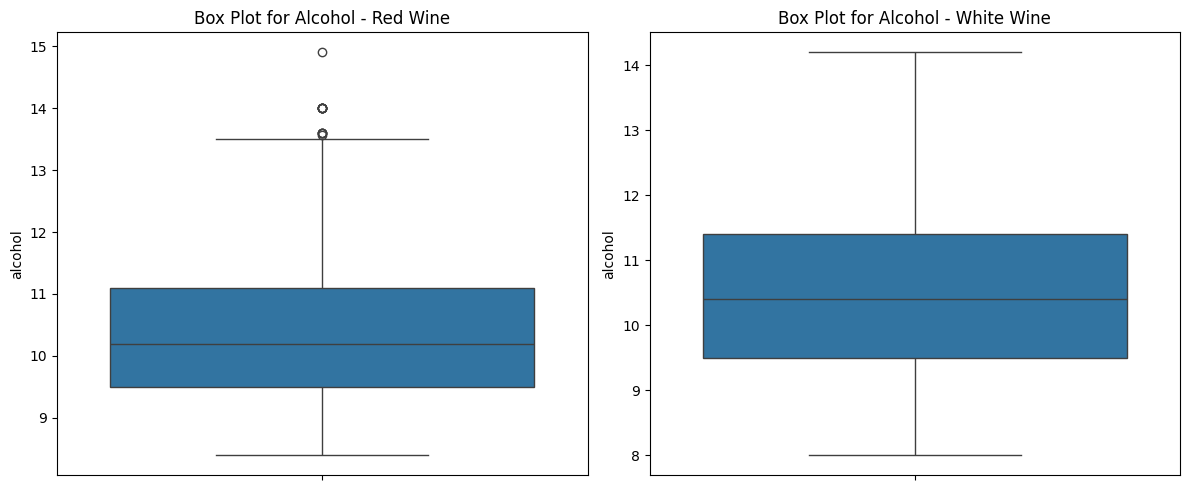

In [38]:
#Looking for outliers in alcohol for both wine types
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=red["alcohol"], ax=axes[0])
axes[0].set_title('Box Plot for Alcohol - Red Wine')
sns.boxplot(y=white["alcohol"], ax=axes[1])
axes[1].set_title('Box Plot for Alcohol - White Wine')
plt.tight_layout()
plt.show()

In [39]:
# Filter for wines where 'alcohol' is greater than 14 in both datasets
outliers_red = red[red['alcohol'] > 14]
outliers_white = white[white['alcohol'] > 14]

# Display the size of the outlier sets and samples
print(f"Red Wine - Number of wines with alcohol > 14: {outliers_red.shape[0]}")
if not outliers_red.empty:
    print("Sample of red wines with high alcohol content:")
    print(outliers_red[['alcohol', 'quality']].head())
    print(f"Unique quality scores: {sorted(outliers_red['quality'].unique())}")

print(f"\nWhite Wine - Number of wines with alcohol > 14: {outliers_white.shape[0]}")
if not outliers_white.empty:
    print("Sample of white wines with high alcohol content:")
    print(outliers_white[['alcohol', 'quality']].head())
    print(f"Unique quality scores: {sorted(outliers_white['quality'].unique())}")

Red Wine - Number of wines with alcohol > 14: 1
Sample of red wines with high alcohol content:
     alcohol  quality
652     14.9        5
Unique quality scores: [np.int64(5)]

White Wine - Number of wines with alcohol > 14: 2
Sample of white wines with high alcohol content:
      alcohol  quality
3918    14.20        7
4503    14.05        7
Unique quality scores: [np.int64(7)]


Now we are going to check if there is a relation between alcohol and wine quality by using a scatter plot

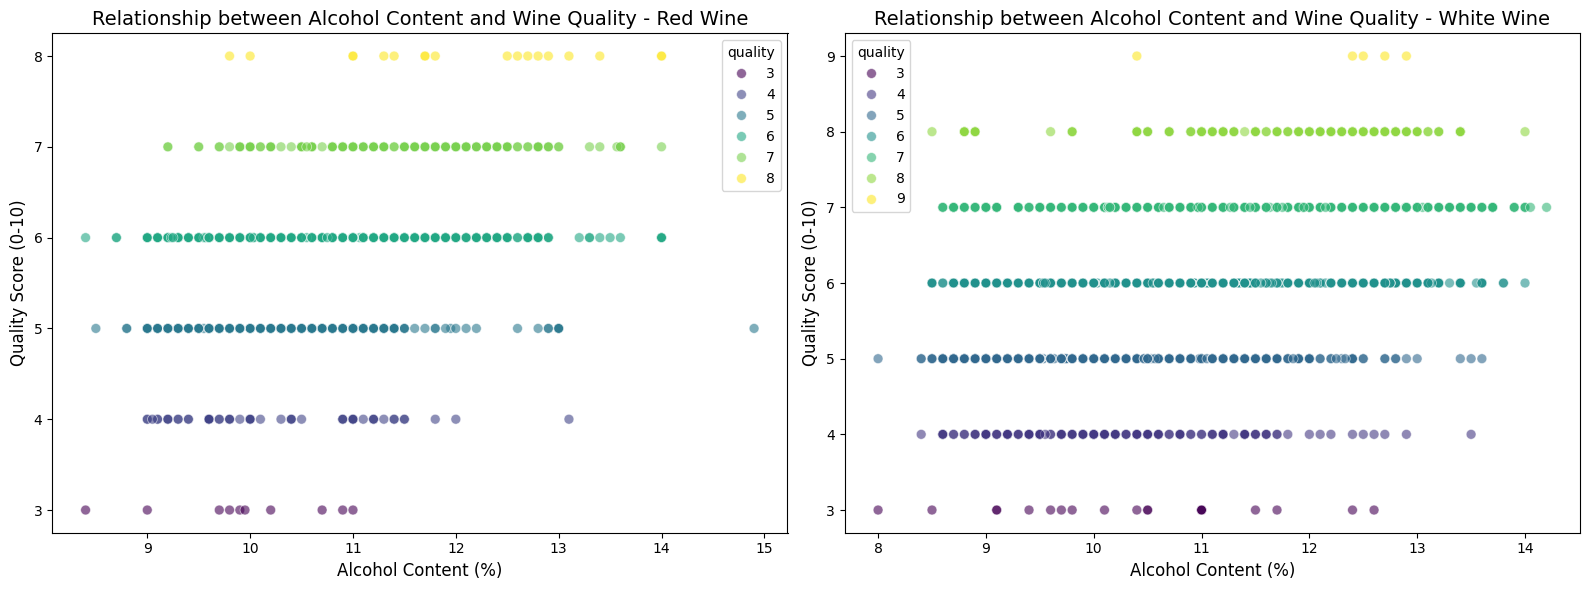

In [40]:
# Create scatter plots for both wine types
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Red wine scatter plot
sns.scatterplot(x='alcohol', y='quality', data=red, alpha=0.6, s=50,
                hue='quality', palette='viridis', ax=axes[0])
axes[0].set_title('Relationship between Alcohol Content and Wine Quality - Red Wine', fontsize=14)
axes[0].set_xlabel('Alcohol Content (%)', fontsize=12)
axes[0].set_ylabel('Quality Score (0-10)', fontsize=12)
axes[0].set_yticks(sorted(red['quality'].unique()))

# White wine scatter plot
sns.scatterplot(x='alcohol', y='quality', data=white, alpha=0.6, s=50,
                hue='quality', palette='viridis', ax=axes[1])
axes[1].set_title('Relationship between Alcohol Content and Wine Quality - White Wine', fontsize=14)
axes[1].set_xlabel('Alcohol Content (%)', fontsize=12)
axes[1].set_ylabel('Quality Score (0-10)', fontsize=12)
axes[1].set_yticks(sorted(white['quality'].unique()))

plt.tight_layout()
plt.savefig('alcohol_vs_quality_scatter.png')
plt.show()

Now we are going to check if there is a relation between volatile acidity and wine quality by using a scatter plot

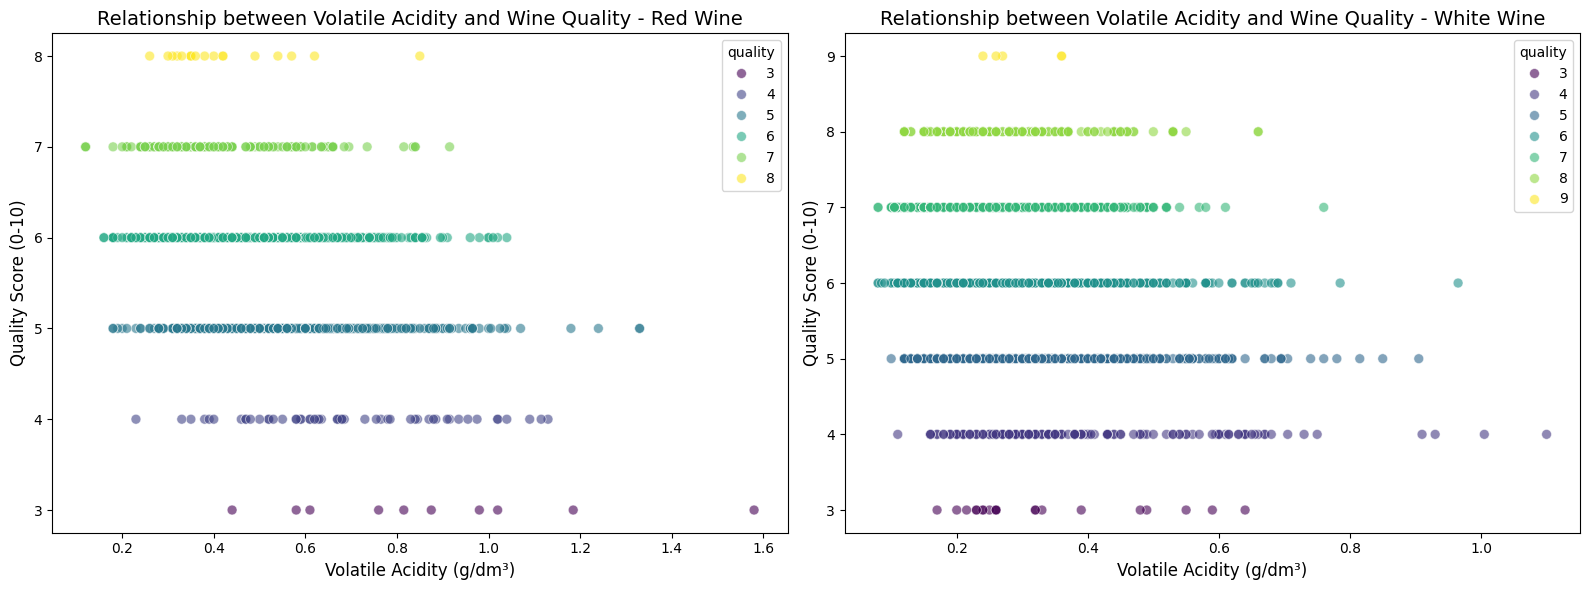

In [41]:
# Create scatter plots for volatile acidity vs quality for both wine types
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Red wine scatter plot
sns.scatterplot(x='volatile acidity', y='quality', data=red, alpha=0.6, s=50,
                hue='quality', palette='viridis', ax=axes[0])
axes[0].set_title('Relationship between Volatile Acidity and Wine Quality - Red Wine', fontsize=14)
axes[0].set_xlabel('Volatile Acidity (g/dm³)', fontsize=12)
axes[0].set_ylabel('Quality Score (0-10)', fontsize=12)
axes[0].set_yticks(sorted(red['quality'].unique()))

# White wine scatter plot
sns.scatterplot(x='volatile acidity', y='quality', data=white, alpha=0.6, s=50,
                hue='quality', palette='viridis', ax=axes[1])
axes[1].set_title('Relationship between Volatile Acidity and Wine Quality - White Wine', fontsize=14)
axes[1].set_xlabel('Volatile Acidity (g/dm³)', fontsize=12)
axes[1].set_ylabel('Quality Score (0-10)', fontsize=12)
axes[1].set_yticks(sorted(white['quality'].unique()))

plt.tight_layout()
plt.savefig('volatile_acidity_vs_quality_scatter.png')
plt.show()

Now we are going to check if there is a relation between Density Content and wine quality by using a scatter plot

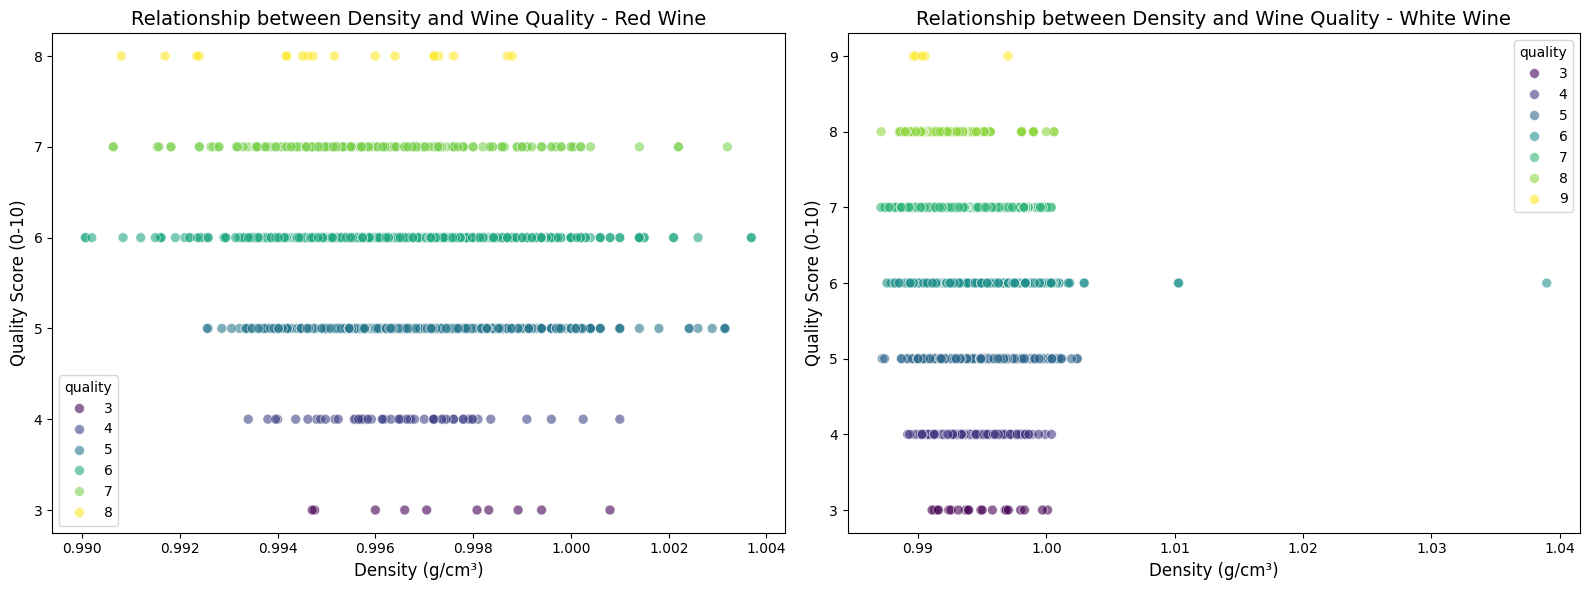

In [42]:
# Create scatter plots for density vs quality for both wine types
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Red wine scatter plot
sns.scatterplot(x='density', y='quality', data=red, alpha=0.6, s=50,
                hue='quality', palette='viridis', ax=axes[0])
axes[0].set_title('Relationship between Density and Wine Quality - Red Wine', fontsize=14)
axes[0].set_xlabel('Density (g/cm³)', fontsize=12)
axes[0].set_ylabel('Quality Score (0-10)', fontsize=12)
axes[0].set_yticks(sorted(red['quality'].unique()))

# White wine scatter plot
sns.scatterplot(x='density', y='quality', data=white, alpha=0.6, s=50,
                hue='quality', palette='viridis', ax=axes[1])
axes[1].set_title('Relationship between Density and Wine Quality - White Wine', fontsize=14)
axes[1].set_xlabel('Density (g/cm³)', fontsize=12)
axes[1].set_ylabel('Quality Score (0-10)', fontsize=12)
axes[1].set_yticks(sorted(white['quality'].unique()))

plt.tight_layout()
plt.savefig('density_vs_quality_scatter.png')
plt.show()

Wine Quality Counts

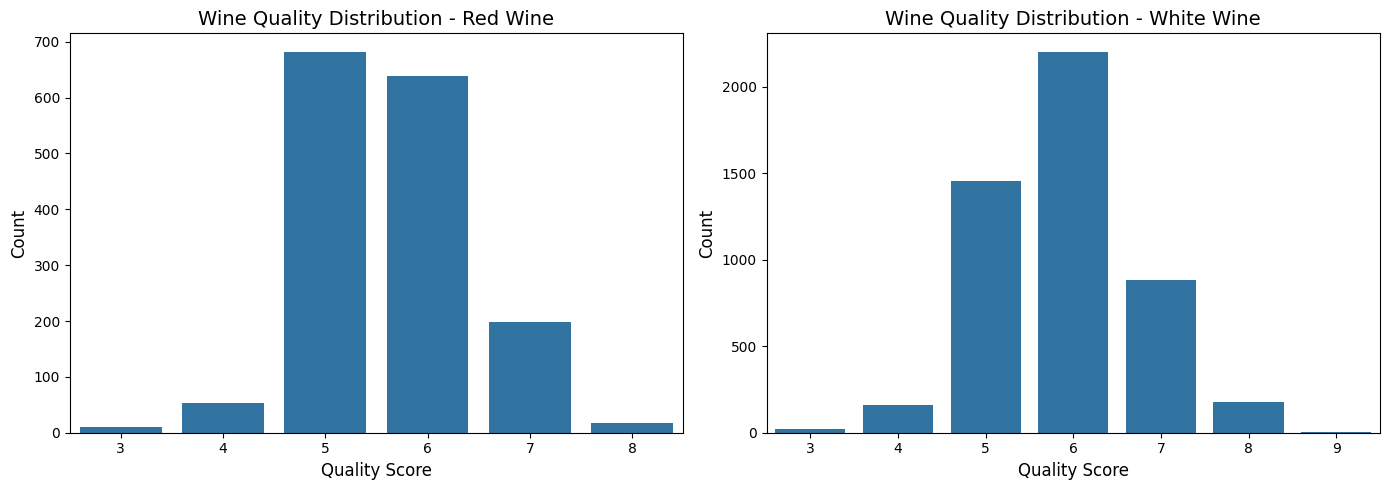

In [43]:
# Quality distribution for both wine types
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x="quality", data=red, ax=axes[0])
axes[0].set_title("Wine Quality Distribution - Red Wine", fontsize=14)
axes[0].set_xlabel("Quality Score", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)

sns.countplot(x="quality", data=white, ax=axes[1])
axes[1].set_title("Wine Quality Distribution - White Wine", fontsize=14)
axes[1].set_xlabel("Quality Score", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()